### FFT example for reference

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
import math
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,5,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)





n = len(y) # length of the signal
print(n)
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
print(frq)
Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.show()

750
[  0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8   2.    2.2
   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2   4.4   4.6
   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6   6.8   7.
   7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.    9.2   9.4
   9.6   9.8  10.   10.2  10.4  10.6  10.8  11.   11.2  11.4  11.6  11.8
  12.   12.2  12.4  12.6  12.8  13.   13.2  13.4  13.6  13.8  14.   14.2
  14.4  14.6  14.8  15.   15.2  15.4  15.6  15.8  16.   16.2  16.4  16.6
  16.8  17.   17.2  17.4  17.6  17.8  18.   18.2  18.4  18.6  18.8  19.
  19.2  19.4  19.6  19.8  20.   20.2  20.4  20.6  20.8  21.   21.2  21.4
  21.6  21.8  22.   22.2  22.4  22.6  22.8  23.   23.2  23.4  23.6  23.8
  24.   24.2  24.4  24.6  24.8  25.   25.2  25.4  25.6  25.8  26.   26.2
  26.4  26.6  26.8  27.   27.2  27.4  27.6  27.8  28.   28.2  28.4  28.6
  28.8  29.   29.2  29.4  29.6  29.8  30.   30.2  30.4  30.6  30.8  31.
  31.2  31.4  31.6  31.8  32.   32.2  32.4  32.6  

In [2]:
import plotly as py
from plotly import tools
import plotly.graph_objs as go

### Load local hist data

In [3]:
"""
ADD binance data
"""
price = pd.read_csv("/home/me/Documents/BWA/data/bw_hist_data/BATBTC.csv")
price.index = (price['Open time']/1000).astype('datetime64[s]')
trace = go.Ohlc(x = price.index,open = price.Open, high = price.High, low = price.Low, close = price.Close)

data = [trace]
py.offline.plot(data, filename = 'testsonic.html')
#price['Close'].plot()

'file:///home/me/Documents/testsonic.html'

In [4]:
class holder:
    1
def heikinashi(prices,periods):
    
    results = holder()
    dict1 = {}
    HAclose = prices[['Open','High','Close','Low']].sum(axis=1)/4
    HAopen = HAclose.copy()
    HAopen.iloc[0] = HAclose.iloc[0]
    HAhigh = HAclose.copy()
    HAlow =  HAclose.copy()
    #populate ha candles
    for i in range(1,len(prices)):
        HAopen.iloc[i] = (HAopen.iloc[i-1]+HAclose.iloc[i-1])/2
        HAhigh.iloc[i] = np.array([prices.High.iloc[i],HAopen.iloc[i],HAclose.iloc[i]]).max()
        HAlow.iloc[i] = np.array([prices.Low.iloc[i],HAopen.iloc[i],HAclose.iloc[i]]).min()
    df = pd.concat((HAopen,HAhigh,HAlow,HAclose),axis=1)
    df.columns = [['Open','High','Close','Low']]
    dict1[periods[0]] = df
    results.candles = dict1
    return results

In [5]:
HAresults = heikinashi(price,[1])
HA = HAresults.candles[1]
print(HA.columns)
trace1 = go.Ohlc(x = HA.index,open = HA.Open, high = HA.High, low = HA.Low, close = HA.Close)


MultiIndex(levels=[['Close', 'High', 'Low', 'Open']],
           labels=[[3, 1, 0, 2]])


ValueError: 
    Invalid value of type 'pandas.core.frame.DataFrame' received for the 'close' property of ohlc
        Received value:                         Close
Open time                    
2018-09-04 21:43:00  0.000031
2018-09-04 21:44:00  0.000031
2018-09-04 21:45:00  0.000031
2018-09-04 21:46:00  0.000031
2018-09-04 21:47:00  0.000031
2018-09-04 21:48:00  0.000031
2018-09-04 21:49:00  0.000031
2018-09-04 21:50:00  0.000031
2018-09-04 21:51:00  0.000031
2018-09-04 21:52:00  0.000031
2018-09-04 21:53:00  0.000031
2018-09-04 21:54:00  0.000031
2018-09-04 21:55:00  0.000031
2018-09-04 21:56:00  0.000031
2018-09-04 21:57:00  0.000031
2018-09-04 21:58:00  0.000031
2018-09-04 21:59:00  0.000031
2018-09-04 22:00:00  0.000031
2018-09-04 22:01:00  0.000031
2018-09-04 22:02:00  0.000031
2018-09-04 22:03:00  0.000031
2018-09-04 22:04:00  0.000031
2018-09-04 22:05:00  0.000031
2018-09-04 22:06:00  0.000031
2018-09-04 22:07:00  0.000031
2018-09-04 22:08:00  0.000031
2018-09-04 22:09:00  0.000031
2018-09-04 22:10:00  0.000031
2018-09-04 22:11:00  0.000031
2018-09-04 22:12:00  0.000031
...                       ...
2018-09-06 21:13:00  0.000028
2018-09-06 21:14:00  0.000028
2018-09-06 21:15:00  0.000028
2018-09-06 21:16:00  0.000028
2018-09-06 21:17:00  0.000028
2018-09-06 21:18:00  0.000028
2018-09-06 21:19:00  0.000028
2018-09-06 21:20:00  0.000028
2018-09-06 21:21:00  0.000028
2018-09-06 21:22:00  0.000028
2018-09-06 21:23:00  0.000028
2018-09-06 21:24:00  0.000028
2018-09-06 21:25:00  0.000028
2018-09-06 21:26:00  0.000028
2018-09-06 21:27:00  0.000028
2018-09-06 21:28:00  0.000028
2018-09-06 21:29:00  0.000028
2018-09-06 21:30:00  0.000028
2018-09-06 21:31:00  0.000028
2018-09-06 21:32:00  0.000028
2018-09-06 21:33:00  0.000028
2018-09-06 21:34:00  0.000028
2018-09-06 21:35:00  0.000028
2018-09-06 21:36:00  0.000028
2018-09-06 21:37:00  0.000028
2018-09-06 21:38:00  0.000028
2018-09-06 21:39:00  0.000028
2018-09-06 21:40:00  0.000028
2018-09-06 21:41:00  0.000028
2018-09-06 21:42:00  0.000028

[2880 rows x 1 columns]

    The 'close' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

## Detrend data for function fit

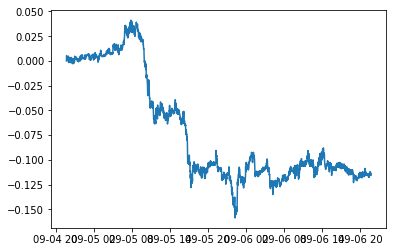

In [6]:
#linear detrend
price['lin_close'] = price['Close'].divide(price['Close'].iloc[0])-1
plt.plot(price['lin_close'])
#difference detrending
price['dif_close'] = price['Close'][1:]-price['Close'][:-1].values
price["x"] = [x for x in range(len(price))]

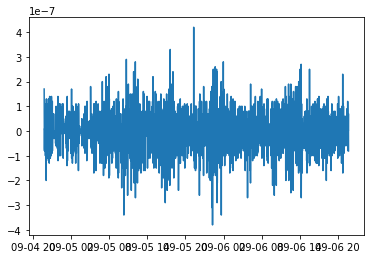

In [7]:
plt.plot(price['dif_close'])

In [8]:
from sklearn.linear_model import LinearRegression

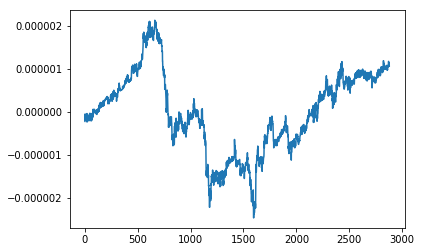

In [9]:
x = price.x.values
y = price.Close.values

model = LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
#linear detrend
trend = model.predict(x.reshape(-1,1))
#back to 1d
trend = trend.reshape((len(x),))
detrend = y-trend
plt.plot(detrend)

[  0.00000000e+00   6.66666667e-03   1.33333333e-02 ...,   1.99800000e+01
   1.99866667e+01   1.99933333e+01]
[   0    1    2 ..., 2877 2878 2879]
2880
[  0.00000000e+00   5.20833333e-02   1.04166667e-01 ...,   7.48437500e+01
   7.48958333e+01   7.49479167e+01]
[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]


/home/me/bw-env/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



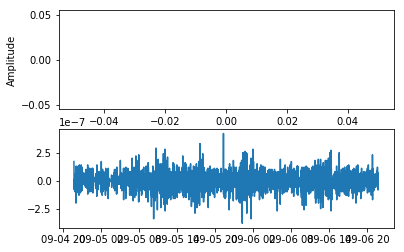

In [13]:
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,20,Ts) # time vector
print(t)
t2 = np.arange(0,2880)#np.linspace(0,2880,1)
print(t2)
ff = 5;   # frequency of the signal
y = price['dif_close'].values





n = len(y) # length of the signal
print(n)
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range
print(frq)
Y = np.fft.fft(y)/n # fft computing and normalization
#Y = Y[range(int(n/2))]
print(np.nan_to_num(Y))
fig, ax = plt.subplots(2, 1)
ax[0].plot(t2,Y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(price.dif_close) # plotting the spectrum


plt.show()

In [ ]:
import scipy.optimize
from scipy.optimize imprt OptimizeWarning
#scipy for fit custom functions
def ftransform(x,a0,a1,b1,w):
    f = a0 +a1*np.cos(w*x)+b1*np.sin(w*x)
    return f

def sseries(x,a0,a1,b1,w):
    f = a0 +b1*np.sin(w*x)
    return f

def fourier(p,t):
    dict = {}
    results = 
    for i in range(len(t)):
        coeffs = []
        for j in range(t[i],len(p)-t[i]):
            x = np.arrange(0,t[i])
            y = p['dif_close'].iloc[i-t[i]:j]
            
            with warnings.catch_warnings():
                warnings.simplefilter('error', OptimizeWarning)
                try:
                    res = scipy.optimize.curve_fit(ftransform,x,y)
                except (RuntimeError,OptimizeWarning):
                    res = np.emtpy((1,4))
                    res[0,: = np.NAN]
            xt = np.linspace(0,t[i],100)
            yt = fseries(xt,res[0][0],res[0][1],res[0][2],res[0][3])
            plt.plot(x,y)
            plt.plot(xt,yt,"r")
            plt.show()
            coeffs = np.append(coeffs, res[0], axis=0)
        coeffs = np.array(coeffs).reshape(((len(coeffs)/4,4)))
        df = pd.DataFrame(coeffs, index=price.Close[t[i]:-t[i]])
        df.columns = [[x,a0,a1,b1,w]]
        df = df.fillna(method='bfill')
        dict[t[i]] = df
    
    results.coeffs = dict
    return results